In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import water

# %matplotlib inline

In [2]:
# Water
A_dict = {
    "A1": (3.55959, 643.748, -198.043),
    "A2": (5.40221 , 1838.675 , -31.737),
    # "A5": (5.08354 , 1663.125 , -45.622),
    "A7": (4.6543 , 1435.264 , -64.848)
}
T_boil = 373.0
P_boil = 1.0    # bar 

T_trip = 273.16
P_trip = 611.655 * 1.0e-5  # bar 

L_evap = 40700.0 
T_crit = 647.096 

In [3]:
# Methane
# A_dict = {
#     "A1": (3.9895, 443.028, -0.49),
#     "A4": (4.22061,	516.689, 11.223)
# }
# T_boil = 111.0

In [4]:
# Antoine equation (pressure [bar])
def antoine(t,A):
    return 10**( A[0] - (A[1]/(t+A[2])) )

In [5]:
def integ_clausius(t1,p1,t2,L):
    lnp2p1 = -(L/8.314) * (1/t2 - 1/t1)

    p2 = np.exp(lnp2p1) * p1
    return p2

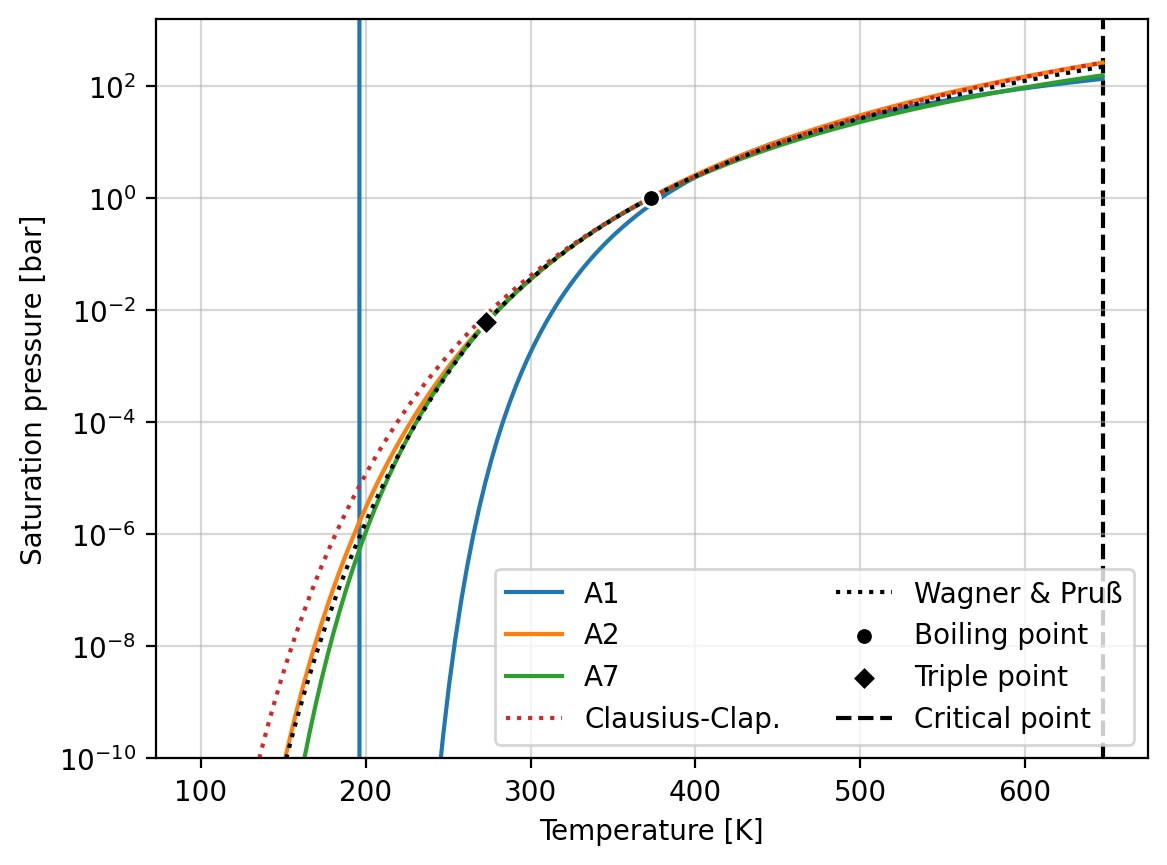

In [6]:
plt.close("all")

fig,ax = plt.subplots(1,1)

arr_t = np.linspace(100, T_crit, 150)

for k in A_dict.keys():
    Acoeffs = A_dict[k]
    arr_p = antoine(arr_t,Acoeffs)
    ax.plot(arr_t, arr_p, label=k)

ax.plot(arr_t, integ_clausius(T_boil, P_boil*1e5, arr_t, L_evap)*1.0e-5, ls='dotted', label="Clausius-Clap.")
ax.plot(arr_t, [water.psat_both(t)*1e-5 for t in arr_t], ls='dotted', label="Wagner & Pruß", c='k')

mc = 'black'
me = 'white'
ms = 40.0
ax.scatter(T_boil, P_boil, c=mc, s=ms, edgecolors=me, zorder=3, label="Boiling point")
ax.scatter(T_trip, P_trip, c=mc, s=ms, edgecolors=me, zorder=3, label="Triple point", marker='D')
ax.axvline(x=T_crit,       c=mc, zorder=0, label="Critical point", ls='dashed')

ax.set(xlabel="Temperature [K]", ylabel="Saturation pressure [bar]")
ax.set(yscale="log")

ax.set_ylim(1.0e-10, np.amax(arr_p)*10)

ax.legend(ncols=2)
ax.grid(alpha=0.5)
ax.set_axisbelow(True)

plt.show()